# Taylor problem 1.39

last revised: 07-Jan-2019 by Dick Furnstahl [furnstahl.1@osu.edu]

The goal of this notebook is to practice Python while considering some visualizations of problem 1.39 to see how they might help check the results, interpret the behavior, or suggest new ideas on how to extend the problem.  Suggestions are very welcome! We'll use the notebook Matplotlib backend for Jupyter (`%matplotlib notebook`) to allow for reading points off the plot.

**Problem statement:** A ball is thrown with initial speed $v_0$ up an inclined plane.  The plane is inclined at an angle $\phi$ above the horizontal, and the ball's initial velocity is at an angle $\theta$ above the plane.  Choose axes with $x$ measured up the slope, $y$ normal to the slope, and $z$ across it.  Write down Newton's second law using these axes and find the ball's position as a function of time.  Show that the ball lands a distance

$
\begin{align}
    R = \frac{2 v_0^2 \sin\theta \cos(\theta+\phi)}{g \cos^2\phi}
\end{align}
$

from its launch point.  Show that for given $v_0$ and $\phi$, the maximum possible range up the inclined plane is

$
\begin{align}
   R_{\textrm{max}} = \frac{v_0^2}{g(1+\sin\phi)}  \;.
\end{align}
$

### Gameplan:
* Accept the formulas for $R$ and $R_\textrm{max}$ as given and make plots.  Interpret.
* Use a fixed value of phi first, then loop through phi.  
* Add formatting to plots (and widgets!).  
* Check the formulas using sympy.
* Solve the ODE numerically and make some spot comparisons to the formulas. 

### Make plots of $R$ and $R_\textrm{max}$

We are given expressions for $R$ and $R_\textrm{max}$, so we'll first turn them into functions.  Then make some plots.

In [1]:
import numpy as np
from numpy import pi

In [2]:
def Range_R(theta, phi, g=9.8, v0=1.0):
    """
    Distance R up the plane given angles theta and phi.
    Given in Taylor problem 1.39.    
    """
    return (2.*v0**2 * np.sin(theta) * np.cos(theta+phi))/(g*np.cos(phi)**2)

In [3]:
def Rmax(phi, g=9.8, v0=1.0):
    """
    Maximum distance up the plane for fixed angle phi. 
    Given in Taylor problem 1.39.
    """
    return v0**2/(g*(1. + np.sin(phi)))

In [4]:
# set up for plotting but now using the notebook backend
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl

# The following can be uncommented if we want to adjust the font size.
plt.rcParams.update({'font.size': 10})

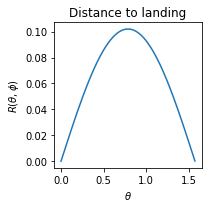

In [22]:
# Make a plot of range R versus theta for several phi values
phi_vec = [0., pi/8., pi/4., 3.*pi/8.]
theta = np.arange(0,pi/2.,0.01)

# Label the figure and axis with _R to distinguish it
fig_R = plt.figure(figsize=(3,3))
ax_R = fig_R.add_subplot(1,1,1)
ax_R.set_title('Distance to landing')
ax_R.set_xlabel(r'$\theta$')
ax_R.set_ylabel(r'$R(\theta,\phi)$')

# start with phi=0 to see if it looks right
ax_R.plot(theta, Range_R(theta,phi=0.))
fig_R.tight_layout()  # make the spacing of subplots nicer


Point to the curve to read off coordinates and try out the various controls (hover over a button to reveal a tooltip).

Remember that this is not a trajectory; each trajectory is just one point on this curve, specified by $\theta$ and $\phi=0$.  Does the shape and features of the curve (e.g., symmetry about the peak) agree with your intuition?  Can you prove (or verify) it should be that way from the analytic formula?

It's awkward to work in radians when our intuition (mine, at least) is better in degrees.  Let's define some functions to convert (no doubt there are built-in functions, but these are easy and good practice for us).

In [6]:
def rad_to_deg(theta_rad):
    """Take as input an angle in radians and return it in degrees."""
    return 180./np.pi * theta_rad

def deg_to_rad(theta_deg):
    """Take as input an angle in degrees and return it in radians."""
    return np.pi/180. * theta_deg


Now make a plot with $\theta$ in degrees with a list of $\phi$ values, specified in radians but converted to degrees for the plot legend.

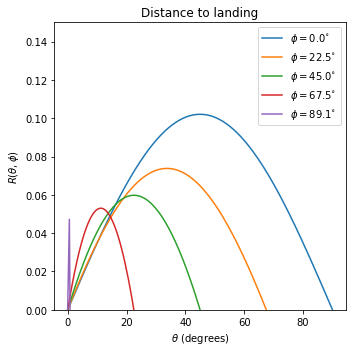

In [34]:
# Now make a plot of range R versus theta for several phi values
phi_vec = [0., pi/8., pi/4., 3.*pi/8., 0.99*pi/2]
theta = np.arange(0,pi/2.,0.01)
theta_deg = rad_to_deg(theta)

fig_R = plt.figure(figsize=(5,5))
ax_R = fig_R.add_subplot(1,1,1)
ax_R.set_title('Distance to landing')
ax_R.set_xlabel(r'$\theta$ (degrees)')
ax_R.set_ylabel(r'$R(\theta,\phi)$')

#ax_R.plot(theta, Range_R(theta,phi=0.))

ax_R.set_ylim(0.,0.15)
for phi in phi_vec:
    label_phi = fr'$\phi = {rad_to_deg(phi):.1f}\!^\circ$'
    ax_R.plot(theta_deg, Range_R(theta,phi), label=label_phi)
ax_R.legend()

fig_R.tight_layout()  # make the spacing of subplots nicer

Hmmm, it would be nice to have a picture of the incline next to this.  How would we do that?

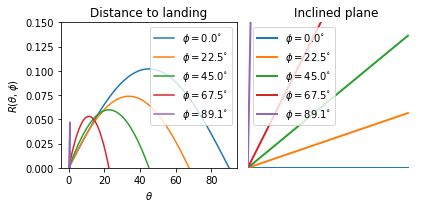

In [24]:
# make a plot of range R versus theta for several phi values
phi_vec = [0., pi/8., pi/4., 3.*pi/8., 0.99*pi/2]
theta = np.arange(0,pi/2.,0.01)
theta_deg = rad_to_deg(theta)

fig_R = plt.figure(figsize=(6,3))
ax_R = fig_R.add_subplot(1,2,1)
ax_R.set_title('Distance to landing')
ax_R.set_xlabel(r'$\theta$')
ax_R.set_ylabel(r'$R(\theta,\phi)$')

ax_R.set_ylim(0.,0.15)
for phi in phi_vec:
    label_phi = fr'$\phi = {rad_to_deg(phi):.1f}\!^\circ$'
    ax_R.plot(theta_deg, Range_R(theta,phi), label=label_phi)
ax_R.legend()

# now add another subplot with the inclined plane.
ax_plane = fig_R.add_subplot(1,2,2)
ax_plane.set_title('Inclined plane')
ax_plane.set_xlim(0.,1.1)
ax_plane.set_ylim(0.,1.1)
for phi in phi_vec:
    label_phi = fr'$\phi = {rad_to_deg(phi):.1f}\!^\circ$'
    x_pts = [0., 1.]
    y_pts = [0., np.tan(phi)]
    ax_plane.plot(x_pts, y_pts, label=label_phi, lw=2)
ax_plane.axis('off')
ax_plane.legend()

fig_R.tight_layout()  # make the spacing of subplots nicer


Ok, now we can look at the $R(\theta,\phi)$ plot and make observations, which we can then try to back-up from the formula. **Try to answer these questions.** 
* Can you generalize the argument about symmetry to any $\phi$?
* What are the constraints on $R$ from the figure?  Do they match the formula?
* Do the changes in the curves with increasing $\phi$ make sense?  Can they be extracted from the formula?

Now plot the $R_{max}$ formula. **Evaluate whether it is consistent with the plots of R.**

TypeError: 'Mul' object is not callable

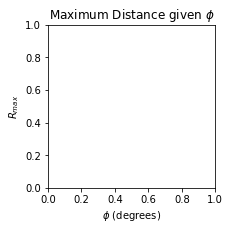

In [35]:
# make a plot of R_max versus phi
fig_Rmax = plt.figure(figsize=(3,3), num='Taylor 1.39')
ax_Rmax = fig_Rmax.add_subplot(1,1,1)
ax_Rmax.set_title(r'Maximum Distance given $\phi$')
ax_Rmax.set_xlabel(r'$\phi$ (degrees)')
ax_Rmax.set_ylabel(r'$R_{max}$')

phi = np.arange(0,pi/2.,.1)
ax_Rmax.plot(rad_to_deg(phi), Rmax(phi))

fig_Rmax.tight_layout()  # make the spacing of subplots nicer

**Spotcheck some points on this curve against the previous graph of $R$.  What should you compare?**

### Widgetizing with ipywidgets and interact

The widgets don't seem to play well with the notebook back end, so we'll switch to `%matplotlib inline`.  You may need to restart the kernel.

In [10]:
%matplotlib inline

from ipywidgets import interact, fixed
import ipywidgets as widgets

# A simple function evaluation (all in radians at this point).
interact(Range_R, theta=np.pi/4., phi=(0,np.pi/2), g=fixed(9.8));

interactive(children=(FloatSlider(value=0.7853981633974483, description='theta', max=2.356194490192345, min=-0…

In [11]:
def plot_range_R_versus_theta(phi_deg=0):
    """Make a plot of range R versus theta for given phi values in degrees"""

    phi_rad = deg_to_rad(phi_deg)
    theta_deg = np.arange(0,90.,0.1)
    theta_rad = deg_to_rad(theta_deg)
    range_R = Range_R(theta_rad,phi_rad)
    
    fig_R = plt.figure(figsize=(6,3), num='Taylor 1.39')
    ax_R = fig_R.add_subplot(1,2,1)
    ax_R.set_title('Distance to landing')
    ax_R.set_xlabel(r'$\theta$')
    ax_R.set_ylabel(r'$R(\theta,\phi)$')

    label_phi = fr'$\phi = {phi_deg:.1f}\!^\circ$'
    ax_R.plot(theta_deg, range_R, label=label_phi)
    ax_R.set_ylim(bottom=0., top=1.1*range_R.max())  # set limit *after* plotting to get auto-scaling
    ax_R.legend()

    ax_plane = fig_R.add_subplot(1,2,2)
    ax_plane.set_title('Inclined plane')
    ax_plane.set_xlim(0.,1.1)
    ax_plane.set_ylim(0.,1.1)
    label_phi = fr'$\phi = {phi_deg:.1f}\!^\circ$'
    x_pts = [0., 1.]
    y_pts = [0., np.tan(phi_rad)]
    ax_plane.plot(x_pts, y_pts, label=label_phi, lw=2)
    ax_plane.axis('off')
    ax_plane.legend()
    
    fig_R.tight_layout()  # make the spacing of subplots nicer

interact(plot_range_R_versus_theta, phi_deg=(0.,90.));

interactive(children=(FloatSlider(value=0.0, description='phi_deg', max=90.0), Output()), _dom_classes=('widge…

In [12]:
# to avoid the jiggling and do some formatting
phi_deg_widget = widgets.FloatSlider(min=0., max=90.0, step=0.1, value=0.,
                                     description=r'$\phi$ in degrees',
                                     readout_format='.0f',
                                     continuous_update=False
                                    )
interact(plot_range_R_versus_theta, phi_deg=phi_deg_widget);

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='$\\phi$ in degrees', max=90…

### Ok, how about using sympy?

See if we can reproduce the algebra of solving for final t, x, and y.

In [13]:
import sympy as sy
theta, phi, v0, m, g = sy.symbols('theta phi v0 m g')
x, y, t = sy.symbols('x y t')
half = sy.Rational(1,2)

In [14]:
tf = sy.solve(v0*sy.sin(theta)*t - half*g*sy.cos(phi)*t**2, t)
tf

[0, 2*v0*sin(theta)/(g*cos(phi))]

In [15]:
x = v0*sy.cos(theta)*t - half*g*sy.sin(phi)*t**2
xf = x.subs(t,tf[1])
R = sy.trigsimp(xf)
R

2*v0**2*sin(theta)*cos(phi + theta)/(g*cos(phi)**2)

In [16]:
thetamax = sy.solve(sy.trigsimp(sy.diff(R,theta)),theta)
thetamax

[-phi/2 + pi/4, -phi/2 + 3*pi/4]

In [17]:
Rmax = R.subs(theta,thetamax[0])
sy.simplify(Rmax)

v0**2*(1 - sin(phi))/(g*cos(phi)**2)

### Ok, now as a differential equation

We'll use odeint for simplicity.  Treat it as coupled 2nd-order differential equations for $x(t)$, $y(t)$, $v_x(t)$, and $v_y(t)$:

$
\begin{align}
   \frac{d}{dt}\left(\begin{array}{c}
                          \mathbf{x} \\
                          \mathbf{v}
                      \end{array}\right)
               = \left(\begin{array}{c}
                          \mathbf{v} \\
                          \mathbf{F}/m
                       \end{array}\right)
      \qquad \Longrightarrow \qquad
   \frac{d}{dt}\left(\begin{array}{c}
                          x \\
                          y \\
                          v_x \\
                          v_y
                      \end{array}\right)
               = \left(\begin{array}{c}
                          v_x \\
                          v_y \\
                          F_x/m \\
                          F_y/m
                       \end{array}\right)
\end{align}
$

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [19]:
def ode_rhs(u_vec, t, *params):
    """ 
    Right-hand side (rhs) of the differential equation, with 
    u_vec = [x, y, v_x, v_y] and params = [g, phi].
    """
    x, y, v_x, v_y = u_vec  # We don't actually use x or y here, but could!
    g, phi = params
    return [v_x, v_y, -g*np.sin(phi), -g*np.cos(phi)]

In [20]:
g = 9.8
phi = np.pi/8.
theta = np.pi/4.
v0 = 1.

analytic_range = Range_R(theta,phi,g,v0)
print("Analytic range = {}".format(analytic_range))

u0_vec = [0, 0, v0*np.cos(theta), v0*np.sin(theta)] 

t_max = 1.  # integration time
t_pts = np.arange(0, t_max, 0.01)

# absolute and relative tolerances for ode solver
abserr = 1.0e-8
relerr = 1.0e-6


# Integrate the differential equation
x, y, v_x, v_y = odeint(ode_rhs, u0_vec, t_pts, args=(g, phi), 
              atol=abserr, rtol=relerr).T

Analytic range = 0.06469904807392132


We'll just check one case here, but you can do more!

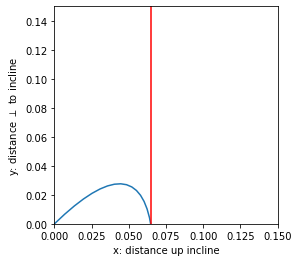

In [21]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(x, y)
ax.set_ylim(0,.15)
ax.set_xlim(0,.15)
ax.set_xlabel('x: distance up incline')
ax.set_ylabel(r'y: distance $\perp$ to incline')
ax.axvline(analytic_range, color="red")

**Did it work?**